# [E-02] Classification

## 1. load_digits : 손글씨 분류

### (1) 필요한 모듈 import하기

In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### (2) 데이터 준비

In [2]:
digits = load_digits()

* load_digits()메서드를 사용해 digits 변수에 데이터를 할당한다.

### (3) 데이터 이해하기

In [3]:
print(dir(digits))
print(digits.keys())

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']
dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


* `dir()`는 객체가 어떤 변수와 메서드를 가지고 있는지 나열한다.
* `digits.keys`를 통해 digits에 담긴 정보들을 확인한다.
* 아래 참고페이지를 통해 digits 테이터는 8X8이미지를 가지고 있다는 것을 알 수 있다.
https://scikit-earn.org/stable/modules/generated/sklearn.datasets.load_digits.html

In [4]:
print(digits.images[0])
print(digits.images[0].shape)

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
(8, 8)


* 위를 통해 digits.images는 이미지 배열을 가지고 있으며, (8, 8)로 8X8이미지라는 것을 알 수 있다.

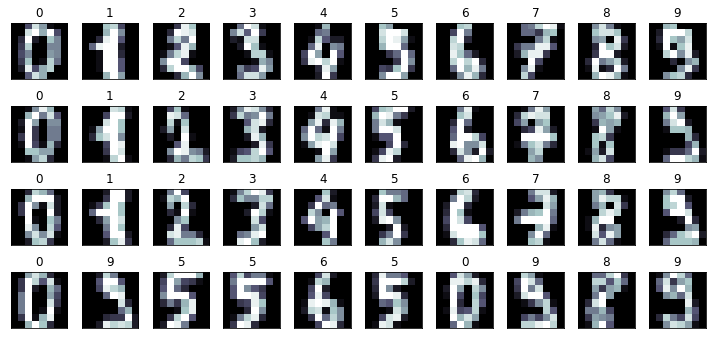

In [5]:
np.random.seed(0)
N = 4
M = 10
fig = plt.figure(figsize=(10, 5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
for i in range(N):
    for j in range(M):
        k = i*M+j
        ax = fig.add_subplot(N, M, k+1)
        ax.imshow(digits.images[k], cmap=plt.cm.bone, interpolation="none")
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.title(digits.target_names[digits.target[k]])
plt.tight_layout()
plt.show()

* 0~9까지의 손글씨 이미지 데이터각 라벨링 되어있는 것을 확인할 수 있다.

In [6]:
# Data Describe
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

* DESCR을 통해 알 수 있는 정보들
  * 총 1797개의 데이터
  * 특성의 개수는 64개
  * 특성 정보는 8X8(64)이미지의정수형 픽셀로 데이터 범위는 0~16
  * 누락된 특성값은 None

In [7]:
print(f"특성의 개수 : {len(digits.feature_names)}")
print(f"특성 : {digits.feature_names}")

특성의 개수 : 64
특성 : ['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1', 'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6', 'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3', 'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7']


In [8]:
digits.target_names   # Label(정답)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [9]:
digits_data = digits.data         # digits_data에 Feature data 할당
digits_label = digits.target      # digits_label에 Label data 할당

# 데이터 shape
print("데이터 shape :", digits_data.shape)
print("라벨 shape :", digits_label.shape)

데이터 shape : (1797, 64)
라벨 shape : (1797,)


In [10]:
digits_df = pd.DataFrame(data=digits_data, columns=digits.feature_names)
digits_df   # pandas가 제공하는 DataFrame 자료형으로 변환

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [11]:
digits_df["label"] = digits.target  # Label(정답)데이터 추가
digits_df.head()  

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,label
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


### (4) train, test 데이터 분리

In [12]:
X_train, X_test, y_train, y_test = train_test_split(digits_data, digits_label, test_size=0.2, random_state=7)

print(f'Number of X_train:{len(X_train)}, Number of X_test:{len(X_test)}')
X_train.shape, X_test.shape

Number of X_train:1437, Number of X_test:360


((1437, 64), (360, 64))

### (5) 다양한 모델로 학습

### (5)-1 Decision Tree

In [13]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(random_state=15)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

digit_acc = {}
digit_acc['Decision Tree'] = accuracy_score(y_test, y_pred)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.81      0.90      0.85        42
           2       0.89      0.82      0.86        40
           3       0.82      0.91      0.86        34
           4       0.83      0.92      0.87        37
           5       0.93      0.96      0.95        28
           6       0.93      0.93      0.93        28
           7       0.87      0.82      0.84        33
           8       0.85      0.67      0.75        43
           9       0.79      0.81      0.80        32

    accuracy                           0.87       360
   macro avg       0.87      0.87      0.87       360
weighted avg       0.87      0.87      0.87       360



### (5)-2 Random Fores

In [14]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(random_state=32)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

digit_acc['Random Fores'] = accuracy_score(y_test, y_pred)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.93      1.00      0.97        42
           2       1.00      1.00      1.00        40
           3       1.00      1.00      1.00        34
           4       0.93      1.00      0.96        37
           5       0.90      0.96      0.93        28
           6       1.00      0.96      0.98        28
           7       0.94      0.97      0.96        33
           8       1.00      0.84      0.91        43
           9       0.94      0.94      0.94        32

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.97      0.96      0.96       360



### (5)-3 SVM 

In [15]:
from sklearn import svm
svm_model = svm.SVC()
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

digit_acc['SVM'] = accuracy_score(y_test, y_pred)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.95      1.00      0.98        42
           2       1.00      1.00      1.00        40
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        37
           5       0.93      1.00      0.97        28
           6       1.00      1.00      1.00        28
           7       1.00      1.00      1.00        33
           8       1.00      0.93      0.96        43
           9       1.00      0.97      0.98        32

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



#### (5)-3.1 정규화

* SVM 모델은 스케일에 아주 민감하다. 조금만 스케일이 차이가 나도 훈련데이터에 과대적합 되어 버린다.
* 따라서 SVM을 적용할 때는 반드시 **정규화**를 해주어야 한다.
* 정규화의 방법
  * 0과 1 사이의 값으로 균등하게 비율을 조정하는 방법
  * 평균0, 표준편차 1의 정규분포로 변환하는 방법
* 데이터의 특성에 맞게 적당한 방법을 선택
* 훈련세트와 테스트세트로 분리되었을 때는, 훈련세트의 값을 기준으로 테스트세트를 변환해야 한다.

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

#### (5)-3.2 정규화 데이터로 SVM 모델 재훈련

In [17]:
svm_model_scaler = svm.SVC()
svm_model_scaler.fit(X_train_scaler, y_train)
y_pred_scaler = svm_model_scaler.predict(X_test_scaler)

digit_acc['SVM_Standard'] = accuracy_score(y_test, y_pred)

print(classification_report(y_test, y_pred_scaler))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.98      1.00      0.99        42
           2       1.00      1.00      1.00        40
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        37
           5       0.97      1.00      0.98        28
           6       1.00      1.00      1.00        28
           7       1.00      1.00      1.00        33
           8       1.00      0.98      0.99        43
           9       1.00      0.97      0.98        32

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



### (5)-4 SGD Classifier

In [18]:
from sklearn.linear_model import SGDClassifier
sgd_model = SGDClassifier()
sgd_model.fit(X_train, y_train)
y_pred = sgd_model.predict(X_test)

digit_acc['SGD Classifier'] = accuracy_score(y_test, y_pred)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.90      0.88      0.89        42
           2       1.00      0.95      0.97        40
           3       0.87      0.97      0.92        34
           4       0.92      0.97      0.95        37
           5       0.93      0.96      0.95        28
           6       0.96      0.93      0.95        28
           7       0.94      0.97      0.96        33
           8       0.93      0.88      0.90        43
           9       0.94      0.94      0.94        32

    accuracy                           0.94       360
   macro avg       0.94      0.94      0.94       360
weighted avg       0.94      0.94      0.94       360



### (5)-5 Logistic Regression 

In [19]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression
logistic_model = LogisticRegression(max_iter = 2500)   # 확인해볼것
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)

digit_acc['Logistic Regression'] = accuracy_score(y_test, y_pred)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.95      0.95      0.95        42
           2       0.98      1.00      0.99        40
           3       0.94      0.97      0.96        34
           4       1.00      1.00      1.00        37
           5       0.79      0.96      0.87        28
           6       1.00      0.96      0.98        28
           7       0.94      0.97      0.96        33
           8       0.92      0.81      0.86        43
           9       0.97      0.88      0.92        32

    accuracy                           0.95       360
   macro avg       0.95      0.95      0.95       360
weighted avg       0.95      0.95      0.95       360



### (6) 결과 정리 및 모델 평가하기

In [20]:
df = pd.DataFrame(digits.data, columns=digits.feature_names)
df['label'] = digits.target  # 각 클래스(라벨) 별 데이터 수 확인

df.label.value_counts().sort_index() # 인덱스 별로 출력

0    178
1    182
2    177
3    183
4    181
5    182
6    181
7    179
8    174
9    180
Name: label, dtype: int64

* 여러 가지 모델 평가 지표 중 <span style="color:red">**accuracy**</span>를 사용한다. <span style="color:red">**accuracy**</span>를 사용하는 이유는 아래와 같다.
  * 위를 보면 알 수 있듯이 각 라벨 별 데이터의 수에서 편향이 확인되지 않는다.
  * 따라서, 정확도(전체 샘플 중 맞게 예측한 샘플 수)를 통해 모델을 평가하는데는 크게 문제가 없다 판단된다. 

In [21]:
for key in digit_acc:
    print(key, ":", digit_acc[key])

Decision Tree : 0.8666666666666667
Random Fores : 0.9638888888888889
SVM : 0.9888888888888889
SVM_Standard : 0.9888888888888889
SGD Classifier : 0.9388888888888889
Logistic Regression : 0.95


* Decision Tree를 제외하고 나머지 모델에서 정확도가 90%를 넘고있다.
* SVM의 경우 성능 향상을 위해 데이터를 정규화하고 모델을 평가했을 때 그 전과 비교해 차이가 없다는 것을 알 수 있다. 
* digits 특성 범위가 0~16으로 고정되어 있으 정규화에 큰 영향을 받지 않는 것으로 보인다.
* 모든 모델들 중 SVM 모델에서 98%의 높은 정확도를 보여준다.
* <span style="color:red">**Digit 데이터**</span>에서는 <span style="color:red">**SVM**</span>을 사용하는 것이 적합하다 판단된다.

## 2. load_wine : 와인 분류

### (1) 필요한 모듈 import하기

In [22]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

### (2) 데이터 준비

In [23]:
wine = load_wine()

* load_wine()메서드를 사용해 wine 변수에 데이터를 할당한다.

### (3) 데이터 이해하기

In [24]:
print(dir(wine)) 
print(wine.keys())

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])


* `dir()`는 객체가 어떤 변수와 메서드를 가지고 있는지 나열한다.
* `wine.keys`를 통해 wine에 담긴 정보들을 확인한다.
* 아래 참고페이지를 통해 각 데이터가 어떤 정보를 담고 있는지 알 수 있다.

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html

In [25]:
# Data Describe
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

* DESCR을 통해 알 수 있는 정보들
  * 총 178개의 데이터
  * 특성의 개수는 13개
  * 누락된 특성값은 None
  * class_0 (59), class_1 (71), class_2 (48) : 총 3개의 라벨이 있고 **라벨 데이터 개수의 분포가 불균형하다**는 것을 알 수 있다.

In [26]:
wine_data = wine.data        # wine_data에 Feature data 할당
wine_label = wine.target     # wine_label에 Label data 할당

# 데이터 shape
# data의 모양 : 178개의 데이터, 13개의 특성
print("데이터 shape :", wine_data.shape) 
# target의 모양 : 178개의 데이터
print("라벨 shape :", wine_label.shape) 

데이터 shape : (178, 13)
라벨 shape : (178,)


In [27]:
for i,name in enumerate(wine.feature_names):  # 총 13개의 특성이 출력될 것
    print('%02d : %s' %(i,name))   

00 : alcohol
01 : malic_acid
02 : ash
03 : alcalinity_of_ash
04 : magnesium
05 : total_phenols
06 : flavanoids
07 : nonflavanoid_phenols
08 : proanthocyanins
09 : color_intensity
10 : hue
11 : od280/od315_of_diluted_wines
12 : proline


In [28]:
wine.target_names    # 총 3개의 라벨(클레스)가 출력될 것

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [29]:
wine_df = pd.DataFrame(data=wine_data, columns=wine.feature_names)
wine_df   # pandas가 제공하는 DataFrame 자료형으로 변환

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [30]:
wine_df["label"] = wine.target  # Label(정답)데이터 추가
wine_df.head() 

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


* 특징값의 분포와 상관관계를 히스토그램과 스캐터플롯으로 시각화하면 다음과 같다. 

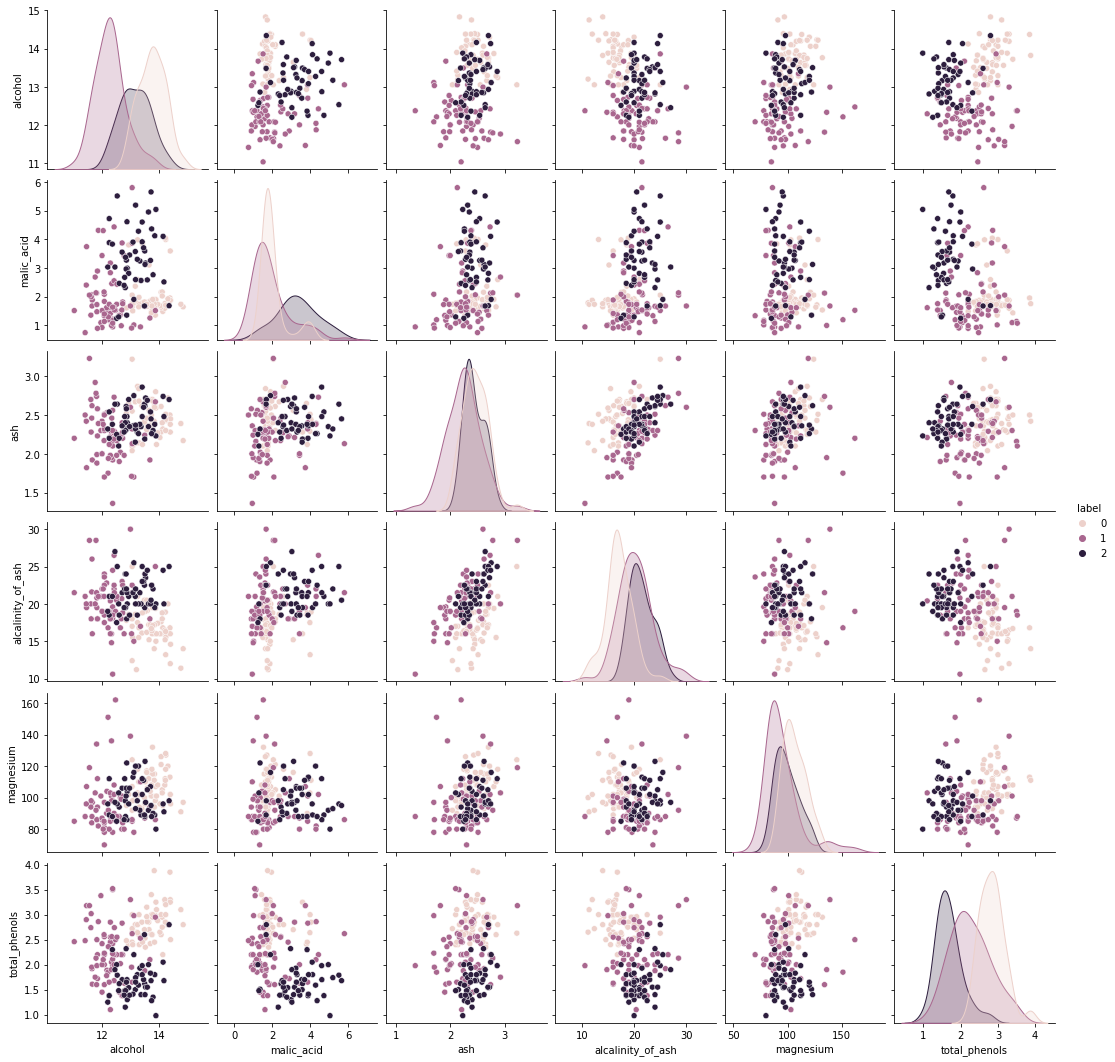

In [31]:
sns.pairplot(vars=["alcohol", "malic_acid", "ash", "alcalinity_of_ash", "magnesium", "total_phenols"], 
             hue="label", data=wine_df)
plt.show()

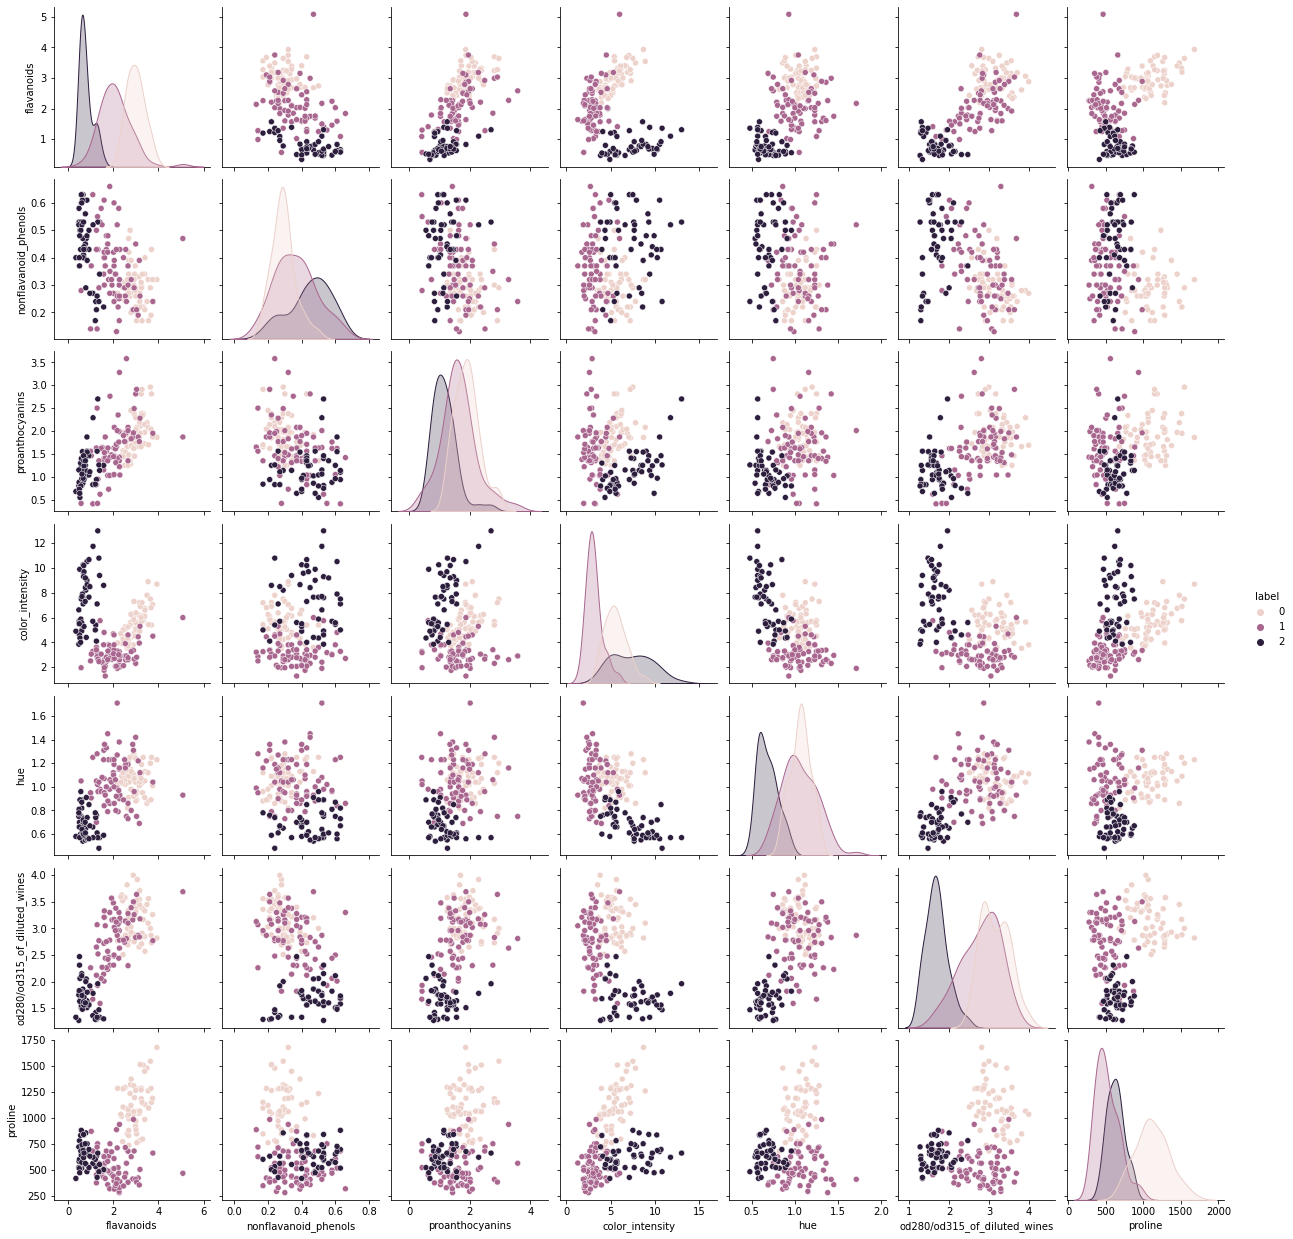

In [32]:
sns.pairplot(vars=["flavanoids", "nonflavanoid_phenols", "proanthocyanins", "color_intensity", "hue", "od280/od315_of_diluted_wines", "proline"], 
             hue="label", data=wine_df)
plt.show()

* 특성 수가 많아 각각 6개, 7개로 나눠 그래프를 그려보았다.
* 그래프를 살펴보면 ash나 alcalinity_of_ash의 경우 각 클래스(와인)의 특성이 드러나지 않는다고 볼 수 있다. 
  (ash나 alcalinity_of_ash로는 와인 분류가 힘들다.)

### (4) train, test 데이터 분리

In [33]:
X_train, X_test, y_train, y_test = train_test_split(wine_data, wine_label, test_size=0.2, random_state=7)

print(f'Number of X_train:{len(X_train)}, Number of X_test:{len(X_test)}')
X_train.shape, X_test.shape

Number of X_train:142, Number of X_test:36


((142, 13), (36, 13))

### (5) 다양한 모델로 학습

### (5)-1 Decision Tree

In [34]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(random_state=15)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

wine_f1 = {}
wine_f1['Decision Tree'] = f1_score(y_test, y_pred, average='weighted')

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93         7
           1       0.89      0.94      0.91        17
           2       1.00      0.83      0.91        12

    accuracy                           0.92        36
   macro avg       0.92      0.92      0.92        36
weighted avg       0.92      0.92      0.92        36



### (5)-2 Random Forest

In [35]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(random_state=32)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

wine_f1['Random Forest'] = f1_score(y_test, y_pred, average='weighted')

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        12

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



### (5)-3 SVM 

In [36]:
from sklearn import svm
svm_model = svm.SVC()
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

wine_f1['SVM'] = f1_score(y_test, y_pred, average='weighted')

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86         7
           1       0.58      0.88      0.70        17
           2       0.33      0.08      0.13        12

    accuracy                           0.61        36
   macro avg       0.59      0.61      0.56        36
weighted avg       0.55      0.61      0.54        36



#### (5)-3.1 정규화

* SVM 모델은 스케일에 아주 민감하다. 조금만 스케일이 차이가 나도 훈련데이터에 과대적합 되어 버린다.
* 따라서 SVM을 적용할 때는 반드시 **정규화**를 해주어야 한다.
* 정규화의 방법
  * 0과 1 사이의 값으로 균등하게 비율을 조정하는 방법
  * 평균0, 표준편차 1의 정규분포로 변환하는 방법
* 데이터의 특성에 맞게 적당한 방법을 선택
* 훈련세트와 테스트세트로 분리되었을 때는, 훈련세트의 값을 기준으로 테스트세트를 변환해야 한다.

In [37]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

#### (5)-3.2 정규화 데이터로 SVM 모델 재훈련

In [38]:
svm_model_scaler = svm.SVC()
svm_model_scaler.fit(X_train_scaler, y_train)
y_pred_scaler = svm_model_scaler.predict(X_test_scaler)

wine_f1['SVM_Standard'] = f1_score(y_test, y_pred, average='weighted')

print(classification_report(y_test, y_pred_scaler))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        12

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



### (5)-4 SGD Classifier

In [39]:
from sklearn.linear_model import SGDClassifier
sgd_model = SGDClassifier()
sgd_model.fit(X_train, y_train)
y_pred = sgd_model.predict(X_test)

wine_f1['SGDClassifier'] = f1_score(y_test, y_pred, average='weighted')

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.47      1.00      0.64         7
           1       0.71      0.88      0.79        17
           2       0.00      0.00      0.00        12

    accuracy                           0.61        36
   macro avg       0.39      0.63      0.48        36
weighted avg       0.43      0.61      0.50        36



/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### (5)-5 Logistic Regression 

In [40]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()   # 확인해볼것
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)

wine_f1['Logistic Regression'] = f1_score(y_test, y_pred, average='weighted')

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       0.94      1.00      0.97        17
           2       1.00      1.00      1.00        12

    accuracy                           0.97        36
   macro avg       0.98      0.95      0.96        36
weighted avg       0.97      0.97      0.97        36



/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### (6) 결과 정리 및 모델 평가하기

In [41]:
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['label'] = wine.target  # 각 클래스(라벨) 별 데이터 수 확인

df.label.value_counts().sort_index() # 인덱스 별로 출력

0    59
1    71
2    48
Name: label, dtype: int64

* 여러 가지 모델 평가 지표 중 <span style="color:red">**f1 score**</span>를 사용한다. <span style="color:red">**f1 score**</span>를 사용하는 이유는 아래와 같다.
  * DESCR를 통해 **라벨 데이터 개수의 분포가 불균형하다**는 것을 확인했으며,
  * 위 코드 출력 결과를 보면 각 라벨 별 데이터의 수가 편향되어 있다는 것을 볼 수 있다.
  * 따라서, 데이터가 불균형할 때 사용하는 f1 score를 통해 모델을 평가하는 것이 타당하다 판단된다.

In [42]:
for key in wine_f1:
    print(key, ":", wine_f1[key])

Decision Tree : 0.9162578162578162
Random Forest : 1.0
SVM : 0.5405684754521964
SVM_Standard : 0.5405684754521964
SGDClassifier : 0.4965443912812333
Logistic Regression : 0.9715506715506714


* SVM의 경우 성능 향상을 위해 데이터를 정규화하고 모델을 평가했을 때 그 전과 비교해 차이가 없다는 것을 알 수 있다.
* 데이터가 정규화에 영향을 많이 받을 만큼 특성 스케일에 차이가 없었던 것으로 예상된다.
* SVM, SVM(정규화), SGDClassifier 모델을 제외하고는 0.9 이상의 score를 보이고 있다.
* 그 중 Random Forest의 score가 1.0으로 가장 높으며,
* <span style="color:red">**Wine 데이터**</span>에서는 <span style="color:red">**Random Forest**</span>를 사용하는 것이 적합하다 판단된다.

## 3. load_breast_cancer : 유방암 여부 진단

### (1) 필요한 모듈 import하기

In [43]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### (2) 데이터 준비

In [44]:
cancer = load_breast_cancer()

* load_breast_cancer()메서드를 사용해 cancer 변수에 데이터를 할당한다.

### (3) 데이터 이해하기

In [45]:
print(dir(cancer)) 
print(cancer.keys())

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names']
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


* `dir()`는 객체가 어떤 변수와 메서드를 가지고 있는지 나열한다.
* `cancer.keys`를 통해 wine에 담긴 정보들을 확인한다.
* 아래 참고페이지를 통해 각 데이터가 어떤 정보를 담고 있는지 알 수 있다.

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html

In [46]:
# Data Describe
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

* DESCR을 통해 알 수 있는 정보들
  * 총 569개의 데이터
  * 특성의 개수는 30개
  * 누락된 특성값은 None
  * 특성 별 최대, 최소값 확인했을 때 스케일 차이가 많이 나는 특성들이 몇 개가 있다.
  * Malignant(212), Benign(357) : 총 2개의 라벨이 있고 **라벨 데이터 개수의 분포가 불균형하다**는 것을 알 수 있다.

In [47]:
cancer_data = cancer.data        # cancer_data에 Feature data 할당
cancer_label = cancer.target     # cancer_label에 Label data 할당

# 데이터 shape
# data의 모양 : 569개의 데이터, 30개의 특성
print("데이터 shape :", cancer_data.shape) 
# target의 모양 : 569개의 데이터
print("라벨 shape :", cancer_label.shape) 

데이터 shape : (569, 30)
라벨 shape : (569,)


In [48]:
cancer.target_names    # 총 2개의 라벨(클레스)가 출력될 것

array(['malignant', 'benign'], dtype='<U9')

In [49]:
malignant = cancer.data[cancer.target==0]
benign = cancer.data[cancer.target==1]

# 각 클래스 별(악성, 양성) 데이터 수 확인
print('malignant(악성) :',malignant.shape)
print('benign(양성) :',benign.shape)

malignant(악성) : (212, 30)
benign(양성) : (357, 30)


* DESCR을 통해 확인했던 것과 같이 클래스(라벨) 별로 데이터 수가 불균형한 것을 볼 수 있다.

In [50]:
for i,name in enumerate(cancer.feature_names):  # 총 30개의 특성이 출력될 것
    print('%02d : %s' %(i,name)) 

00 : mean radius
01 : mean texture
02 : mean perimeter
03 : mean area
04 : mean smoothness
05 : mean compactness
06 : mean concavity
07 : mean concave points
08 : mean symmetry
09 : mean fractal dimension
10 : radius error
11 : texture error
12 : perimeter error
13 : area error
14 : smoothness error
15 : compactness error
16 : concavity error
17 : concave points error
18 : symmetry error
19 : fractal dimension error
20 : worst radius
21 : worst texture
22 : worst perimeter
23 : worst area
24 : worst smoothness
25 : worst compactness
26 : worst concavity
27 : worst concave points
28 : worst symmetry
29 : worst fractal dimension


* radius, texture, perimeter, area, smoothness, compactness, concavity, concave points, symmetry, fractal dimension으로 기본적인 컬럼이 있고 그 내부에 mean, error, worst가 따로 있다.

In [51]:
cancer_df = pd.DataFrame(data=cancer_data, columns=cancer.feature_names)
cancer_df   # pandas가 제공하는 DataFrame 자료형으로 변환

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [52]:
cancer_df["label"] = cancer.target  # Label(정답)데이터 추가
cancer_df.head() 

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


* 각 특성 별로 클래스(라벨) 데이터의 분포를 시각화하여 확인해본다.

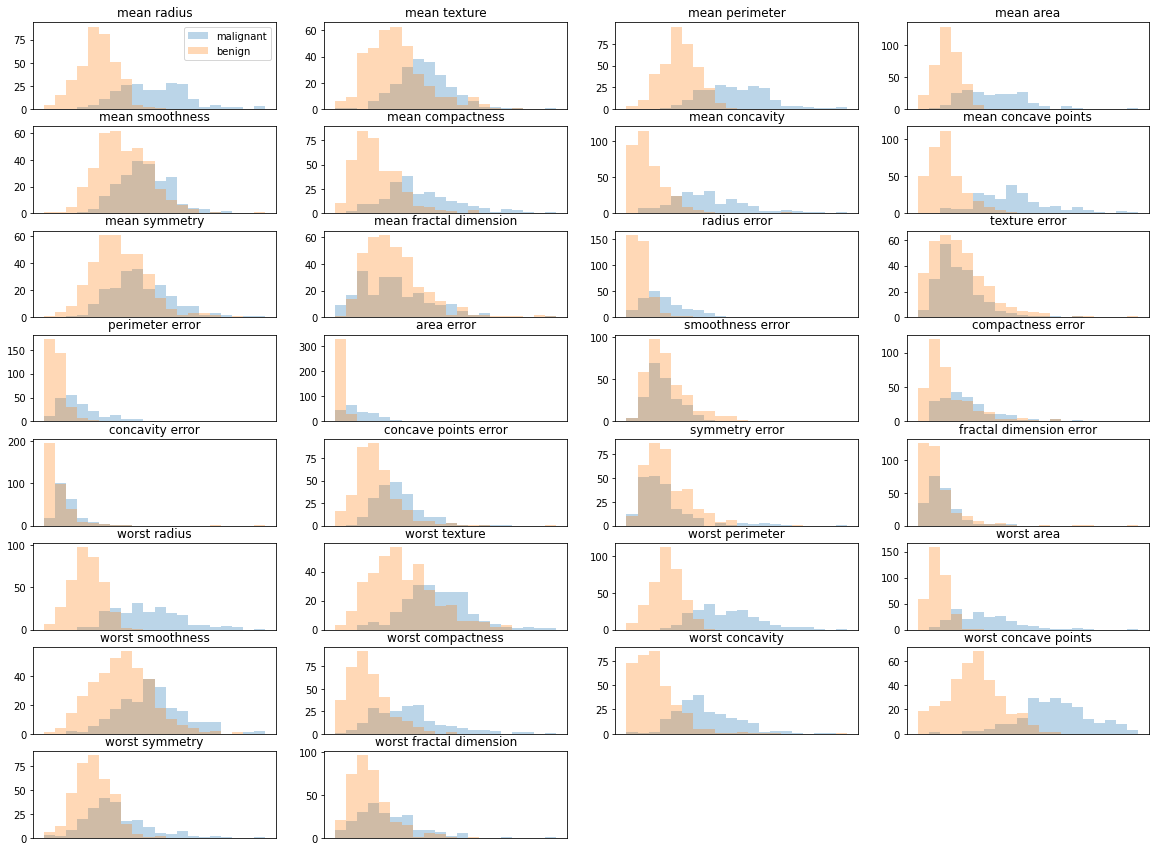

In [53]:
plt.figure(figsize=[20,15])

for col in range(30):
    plt.subplot(8,4,col+1)
    _, bins=np.histogram(cancer.data[:,col], bins=20)

    plt.hist(malignant[:,col],bins=bins, alpha=0.3)
    plt.hist(benign[:,col], bins=bins ,alpha=0.3)
    plt.title(cancer.feature_names[col])
    if col==0: plt.legend(cancer.target_names)
    plt.xticks([])

* 그래프를 살펴보면 compactness error, symmetry error, worst perimeter의 경우 각 클래스(양성, 악성)의 특성이 드러나지 않는다고 볼 수 있다. (compactness error, symmetry error, worst perimeter로는 양성, 악성 분류가 힘들다.)

* 표(DataFrame)로 확인했을 때 값의 크기 차이(자리수)가 많이나는 것을 확인 할 수 있다. 
* 박스 플롯으로 특성의 사분위를 관찰해본다.

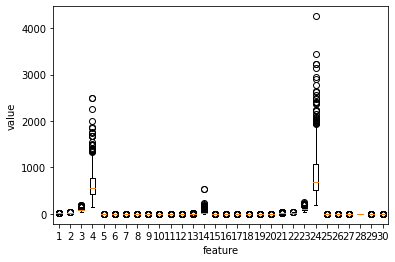

In [54]:
plt.boxplot(cancer.data)
plt.xlabel('feature')
plt.ylabel('value')
plt.show()

* 4, 14, 24번째 특성이 다른 값보다 분포가 큰 것으로 확인된다.
* 4, 14, 24번째 특성이 어떤 것인지 확인해본다.

In [55]:
cancer.feature_names[[3,13,23]]

array(['mean area', 'area error', 'worst area'], dtype='<U23')

* mean area, area error, worst area로 넓이와 관련된 특성임을 알 수 있다.
* 데이터를 정규화시킨 후 분포를 다시 한 번 확인해본다.

### (4) train, test 데이터 분리

* train, test데이터 분리 시 정규화 전 train, test데이터, 정규화 후 train, test데이터로 나눠 비교해본다. 

In [56]:
# 정규화 전
X_train, X_test, y_train, y_test = train_test_split(cancer_data, cancer_label, test_size=0.2, random_state=7)

print(f'Number of X_train:{len(X_train)}, Number of X_test:{len(X_test)}')
X_train.shape, X_test.shape

Number of X_train:455, Number of X_test:114


((455, 30), (114, 30))

In [57]:
# 정규화 후
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

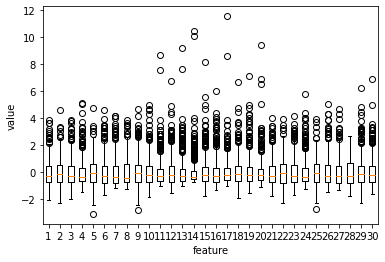

In [58]:
X = np.concatenate([X_train_scaler,X_test_scaler], axis =0)
plt.boxplot(X)
plt.xlabel('feature')
plt.ylabel('value')
plt.show()

* 정규화가 잘 이루워졌음을 확인할 수 있다.

### (5) 다양한 모델로 학습

### (5)-1 Decision Tree

#### (5)-1.1 정규화 전

In [59]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(random_state=15)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

cancer_recall = {}
cancer_recall['Decision Tree'] = recall_score(y_test, y_pred, pos_label=0)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        40
           1       0.96      0.96      0.96        74

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



#### (5)-1.2 정규화 후

In [60]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(random_state=15)
decision_tree.fit(X_train_scaler, y_train)
y_pred = decision_tree.predict(X_test_scaler)

cancer_recall_standard = {}
cancer_recall_standard['Decision Tree_Standard'] = recall_score(y_test, y_pred, pos_label=0)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        40
           1       0.96      0.96      0.96        74

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



### (5)-2 Random Forest

#### (5)-2.1 정규화 전

In [61]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(random_state=32)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

cancer_recall['Random Forest'] = recall_score(y_test, y_pred, pos_label=0)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        74

    accuracy                           1.00       114
   macro avg       1.00      1.00      1.00       114
weighted avg       1.00      1.00      1.00       114



#### (5)-2.2 정규화 후

In [62]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(random_state=32)
random_forest.fit(X_train_scaler, y_train)
y_pred = random_forest.predict(X_test_scaler)

cancer_recall_standard['Random Forest_Standard'] = recall_score(y_test, y_pred, pos_label=0)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        74

    accuracy                           1.00       114
   macro avg       1.00      1.00      1.00       114
weighted avg       1.00      1.00      1.00       114



### (5)-3 SVM 

#### (5)-3.1 정규화 전

In [63]:
from sklearn import svm
svm_model = svm.SVC()
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

cancer_recall['SVM'] = recall_score(y_test, y_pred, pos_label=0)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.72      0.84        40
           1       0.87      1.00      0.93        74

    accuracy                           0.90       114
   macro avg       0.94      0.86      0.89       114
weighted avg       0.92      0.90      0.90       114



#### (5)-3.2 정규화 후

In [64]:
from sklearn import svm
svm_model = svm.SVC()
svm_model.fit(X_train_scaler, y_train)
y_pred = svm_model.predict(X_test_scaler)

cancer_recall_standard['SVM_Standard'] = recall_score(y_test, y_pred, pos_label=0)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        40
           1       0.97      1.00      0.99        74

    accuracy                           0.98       114
   macro avg       0.99      0.97      0.98       114
weighted avg       0.98      0.98      0.98       114



### (5)-4 SGD Classifier

#### (5)-4.1 정규화 전

In [65]:
from sklearn.linear_model import SGDClassifier
sgd_model = SGDClassifier()
sgd_model.fit(X_train, y_train)
y_pred = sgd_model.predict(X_test)

cancer_recall['SGD Classifier'] = recall_score(y_test, y_pred, pos_label=0)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.51      1.00      0.67        40
           1       1.00      0.47      0.64        74

    accuracy                           0.66       114
   macro avg       0.75      0.74      0.66       114
weighted avg       0.83      0.66      0.65       114



#### (5)-4.2 정규화 후

In [66]:
from sklearn.linear_model import SGDClassifier
sgd_model = SGDClassifier()
sgd_model.fit(X_train_scaler, y_train)
y_pred = sgd_model.predict(X_test_scaler)

cancer_recall_standard['SGD Classifier_Standard'] = recall_score(y_test, y_pred, pos_label=0)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.90      0.94        40
           1       0.95      0.99      0.97        74

    accuracy                           0.96       114
   macro avg       0.96      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114



### (5)-5 Logistic Regression 

#### (5)-5.1 정규화 전

In [67]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()   
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)

cancer_recall['Logistic Regression'] = recall_score(y_test, y_pred, pos_label=0)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.85      0.92        40
           1       0.93      1.00      0.96        74

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### (5)-5.2 정규화 후

In [68]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()   
logistic_model.fit(X_train_scaler, y_train)
y_pred = logistic_model.predict(X_test_scaler)

cancer_recall_standard['Logistic Regression_Standard'] = recall_score(y_test, y_pred, pos_label=0)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        40
           1       0.97      1.00      0.99        74

    accuracy                           0.98       114
   macro avg       0.99      0.97      0.98       114
weighted avg       0.98      0.98      0.98       114



### (6) 결과 정리 및 모델 평가하기

In [69]:
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df['label'] = cancer.target  # 각 클래스(라벨) 별 데이터 수 확인

df.label.value_counts().sort_index() # 인덱스 별로 출력

0    212
1    357
Name: label, dtype: int64

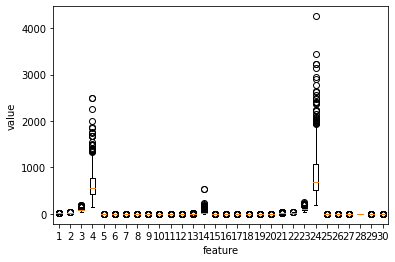

In [70]:
plt.boxplot(cancer.data)
plt.xlabel('feature')
plt.ylabel('value')
plt.show()

* 여러 가지 모델 평가 지표 중 <span style="color:red">**recall**</span>을 사용한다. <span style="color:red">**recall**</span>을 사용하는 이유는 아래와 같다.
  * DESCR를 통해 **라벨 데이터 개수의 분포가 불균형하다**는 것을 확인했으며,
  * 위 코드 출력 결과를 보면 각 라벨 별 데이터의 수가 편향되어 있다는 것을 볼 수 있다.
  * **스케일이 다른** 특성이 있는 것을 확인했다.
  * 그러므로 결과는 정규화 후의 데이터를 사용해 평가를 진행한다.
  * 우리가 이 데이터와 각 모델로 알고 싶은 것은 각 특성 정보들로 양성, 악성을 분류하는 모델이 얼마나 잘 예측(분류)했느냐를 보고 싶은 것이다.
  * 데이터는 암의 정보를 담고 있는데, 암을 양성으로 예측하는 것보다 악성을 양성으로 예측하는 것이 나을 것이다. 
  * 따라서, (데이터가 불균형할 때 사용하는) recall을 통해 모델을 평가하는 것이 타당하다 판단된다. 

In [71]:
# 정규화 전
for key in cancer_recall:
    print(key, ":", cancer_recall[key])

Decision Tree : 0.925
Random Forest : 1.0
SVM : 0.725
SGD Classifier : 1.0
Logistic Regression : 0.85


In [72]:
# 정규화 후
for key in cancer_recall_standard:
    print(key, ":", cancer_recall_standard[key])

Decision Tree_Standard : 0.925
Random Forest_Standard : 1.0
SVM_Standard : 0.95
SGD Classifier_Standard : 0.9
Logistic Regression_Standard : 0.95


* 데이터의 정규화 전과 후, recall score가 차이나는 것을 확인할 수 있다.
* 따라서 데이터의 정규화 후의 recall score를 사용하도록 한다. 
* 해당 recall score 확인 시 모든 모델에서 score가 0.9를 넘는다. 
* 그 중 Random Forest의 score가 1.0으로 가장 높다. 
* <span style="color:red">**Cancer 데이터**</span>에서는 <span style="color:red">**Random Forest_Standard**</span>를 사용하는 것이 적합하다 판단된다.

## 4. 회고

### (1) 이번 프로젝트를 진행하면서 어려웠던 점

* 그렇게까지 방대한 양의 데이터들을 파악한 것이 아님에도 불구하고, 데이터 자체를 이해하는 데 많은 시간이 걸렸으며, 어려움이 많았다.
* accuracy는 어렵지 않았으나 그 외 다른 지표들을 이해하는 데 시간이 많이 걸렸다.
* 내가 파악한 데이터들을 시각화 해보고 싶은 것들이 많았는데, 이것저것 시도해보다 못하고 포기한 것들이 많았다.

### (2) 프로젝트를 진행하면서 알아낸 점 혹은 아직 모호한 점

* 알아낸 점 : 
  1. 같은 데이터들을 넣었음에도 불구하고 분류하는 모델에 따라 결과값이 다르게 나온다.
  2. 연습용으로 사용해보는 데이터들도 파악하기 힘든데, 실제 데이터는 더 힘들겠지? 
  3. 시도해보고 싶었지만 능력부족으로 못하는 것들이 생기면 학습 욕구가 쏟아져 나온다. :-)


* 모호한 점(벨로그 작성 궈궈) : 
  1. 어떤 모델을 사용하냐에 따라 결과가 다르게 나오는 경우들이 있다. 데이터 종류, 담고 있는 정보들에 따라서 모델을 선택하나?
  2. 각 모델들의 분류 방식에 어떤 차이가 있을까?
  3. 표준화와 정규화에 차이가 있을까? 
  4. Min, Max를 사용한 표준화도 있던데, 어떨 때 사용하는 것일까?
  5. 에러는 아니고 경고창 같은게 뜨는데 왜 뜨는걸까?

### (3) 시도한 것들

* 내가 이해한 데이터들을 시각화하기 위한 노력을 해 보았다.

### (4) 자기다짐

* Exprolation을 통해서 내가 배운 것을 잘 써먹을 수 있느냐를 평가해 볼 수 있는 것 같아서 좋다. 그리고 더 좋은 것은 모르는 것들을 찾아보면서 적용해 볼 수 있다는 것이다. 직접 코드를 작성해보고 에러도 만나보고 구글링도 해보면서 좋은 코드가 있으면 내 코드에다가 적용해보기도 한다. 앞으로 Exprolation을 할 때에는 아래 내용들이 틈틈이 확인해 보면서 진행하도록 한다! 
* 내가 배운 것을 잘 써먹을 수 있나
* 구글링을 통해 새로 적용해본 내용이 있나
* 에러가 떴다면 어떤 에러가 떴지(다음에 같은 에러를 만나지 않도록 에러만 따로 정리할 필요도 있을 듯)

## [참고]

* 데이터 전처리 피처 스케일링(Feature Scaling)
https://glanceyes.tistory.com/79
* 데이터 살펴보기 https://datascienceschool.net/03%20machine%20learning/09.01%20%EB%B6%84%EB%A5%98%EC%9A%A9%20%EC%98%88%EC%A0%9C%20%EB%8D%B0%EC%9D%B4%ED%84%B0.html#id11
* Python Numpy(5. 배열연결 및 분할) https://edudeveloper.tistory.com/9